### King Couny 집값 예측 문제

### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data\\house.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 필요없는 특징 없애기

In [4]:
house_data = df.drop(['id','date'],axis=1)
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 상관계수를 통해 어떤 특징이 결과에 영향을 미치는지 객관적인 정도 파악

### 피어슨계수 히트맵으로 시각화하기

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

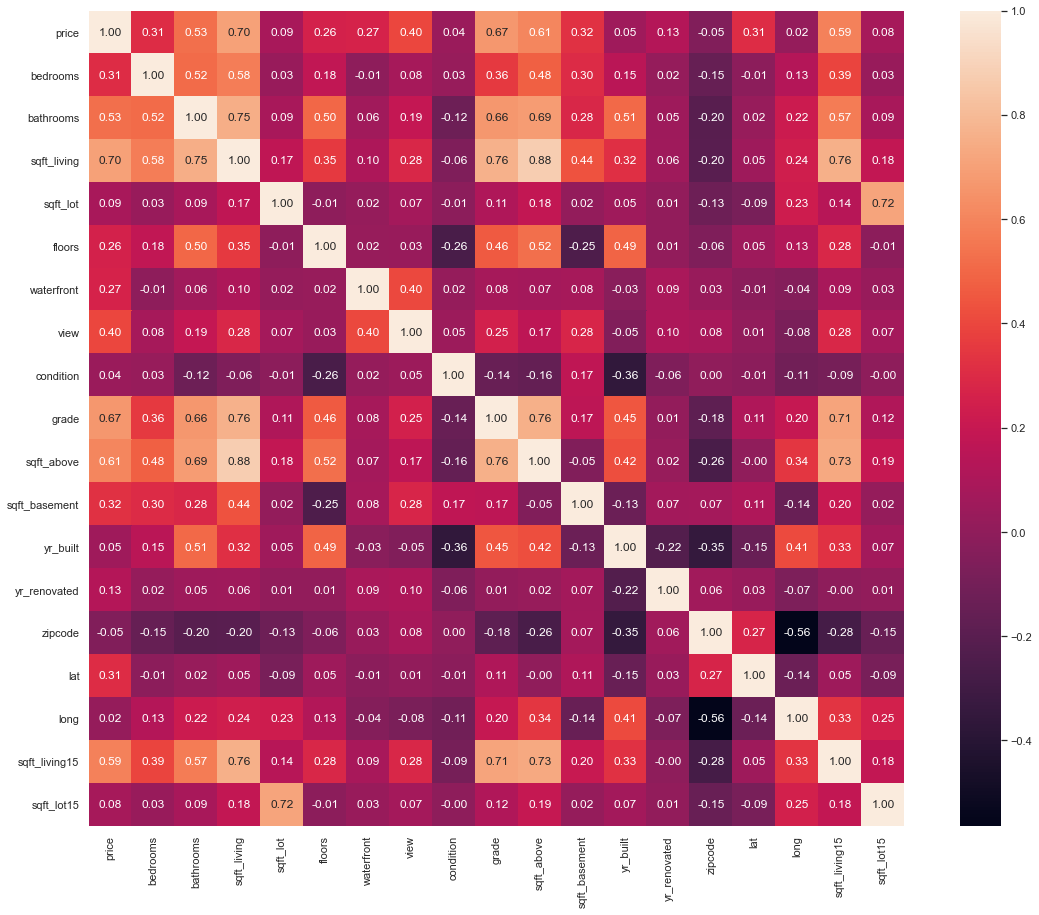

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(house_data.corr(), annot=True, fmt='.2f', square=True)
plt.show()

### catplot으로 산포도 시각화하기

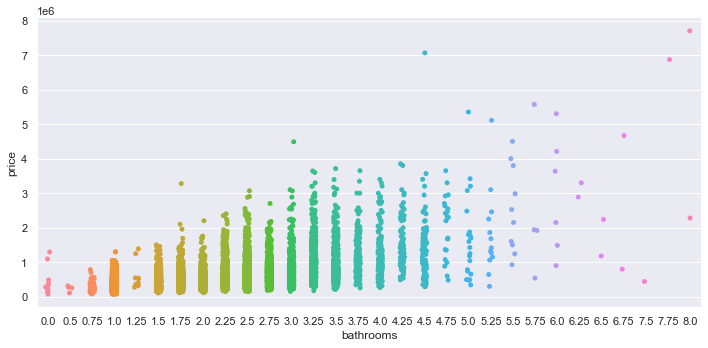

In [7]:
sns.catplot(data=house_data, x='bathrooms', y='price', aspect=2)

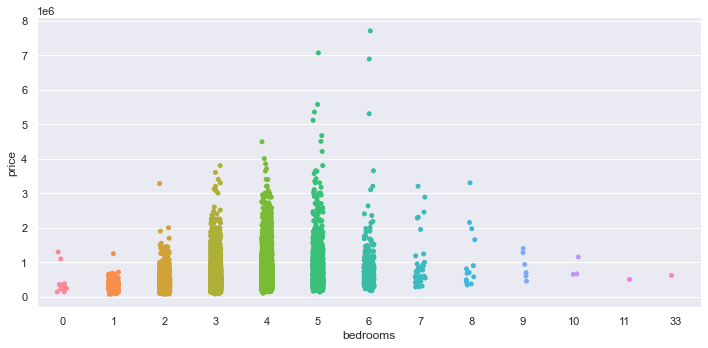

In [8]:
sns.catplot(data=house_data, x='bedrooms', y='price', aspect=2)

### 특징의 범위 파악

In [9]:
house_data['sqft_living'].max()

13540

In [10]:
house_data['price'].max()

7700000.0

### 거주면적에 따른 가격 분포도

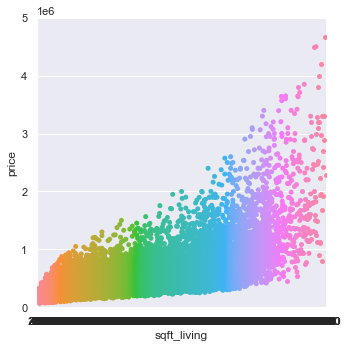

In [11]:
sns.catplot(data=house_data, x='sqft_living', y='price').set(ylim=(0,5000000))

### 데이터 셋 구성하기

In [33]:
from sklearn.model_selection import train_test_split

train_data = house_data.drop(['price'], axis=1)
target_data = house_data[['price']]

# train : test set = 8:2
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2)

# 다시 train set을 8:2로 나눠 validation set
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2 )

print("모든 데이터",train_data.shape)
print("training set", x_train.shape, y_train.shape)
print("validation set",x_valid.shape, y_valid.shape)
print("test set", x_test.shape, y_test.shape)

모든 데이터 (21613, 18)
training set (13832, 18) (13832, 1)
validation set (3458, 18) (3458, 1)
test set (4323, 18) (4323, 1)


### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train)

print("train set score: ", lr.score(x_train, y_train))
print("valid set score: ",lr.score(x_valid, y_valid))

train set score:  0.7025855064188417
valid set score:  0.696001334553153


### Polynomial Regression

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2), LinearRegression()).fit(x_train, y_train)

print("train set score: ", model.score(x_train, y_train))
print("valid set score: ",model.score(x_valid, y_valid))

train set score:  0.8367468564145023
valid set score:  0.8026268923827223


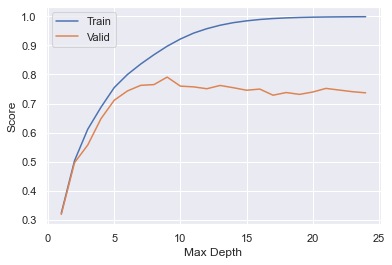

In [36]:
from sklearn.tree import DecisionTreeRegressor
train_score = []
valid_score = []
depth_range = range(1,25)
for depth in depth_range:
    tree = DecisionTreeRegressor(max_depth = depth).fit(x_train,y_train)
    
    train_score.append(tree.score(x_train,y_train))
    valid_score.append(tree.score(x_valid,y_valid))
    
plot1, = plt.plot(depth_range,train_score, label="Train")
plot2, = plt.plot(depth_range,valid_score, label = "Valid")

plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Score')

plt.show()

### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xs_train = scaler.fit_transform(x_train)
xs_train = pd.DataFrame(xs_train, columns=x_train.columns)

ys_train = scaler.fit_transform(y_train)
ys_train = pd.DataFrame(xs_train, columns=y_train.columns)

xs_valid = scaler.fit_transform(x_valid)
xs_valid = pd.DataFrame(xs_train, columns=x_valid.columns)

ys_valid = scaler.fit_transform(x_valid)
ys_valid = pd.DataFrame(xs_train, columns=y_valid.columns)

In [38]:
xs_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04,1.383200e+04
mean,9.182296e-17,-3.184908e-17,4.417776e-17,1.438346e-17,2.208888e-16,3.801342e-17,-2.876691e-17,2.285942e-16,-1.528242e-16,6.883511e-17,7.705423e-18,3.196209e-15,-2.414366e-17,-6.326024e-14,2.049129e-14,1.093554e-14,7.910901e-17,-2.671213e-17
std,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00
min,-3.551483e+00,-2.757793e+00,-1.957891e+00,-3.351311e-01,-9.168544e-01,-8.182774e-02,-3.075087e-01,-3.723587e+00,-5.678336e+00,-1.814927e+00,-6.609062e-01,-2.420924e+00,-2.084443e-01,-1.434325e+00,-2.891094e+00,-2.136224e+00,-2.304545e+00,-4.286223e-01
25%,-3.898685e-01,-8.001763e-01,-7.193328e-01,-2.315279e-01,-9.168544e-01,-8.182774e-02,-3.075087e-01,-6.276111e-01,-5.604335e-01,-7.226625e-01,-6.609062e-01,-6.507405e-01,-2.084443e-01,-8.374037e-01,-6.369636e-01,-8.076223e-01,-7.354194e-01,-2.724156e-01
50%,-3.898685e-01,1.786321e-01,-1.712980e-01,-1.719221e-01,4.797494e-03,-8.182774e-02,-3.075087e-01,-6.276111e-01,-5.604335e-01,-2.736204e-01,-6.609062e-01,1.322253e-01,-2.084443e-01,-2.404829e-01,9.039015e-02,-1.113498e-01,-2.128615e-01,-1.835055e-01
75%,6.640031e-01,5.049015e-01,5.192259e-01,-1.022710e-01,9.264494e-01,-8.182774e-02,-3.075087e-01,9.203770e-01,2.925502e-01,5.152375e-01,6.344215e-01,8.811491e-01,-2.084443e-01,7.295134e-01,8.478326e-01,6.346565e-01,5.419444e-01,-9.622420e-02
max,3.122628e+01,7.682830e+00,1.256503e+01,3.761300e+01,3.691405e+00,1.222079e+01,4.876477e+00,2.468365e+00,4.557469e+00,9.253355e+00,8.724538e+00,1.493905e+00,4.845096e+00,2.259123e+00,1.564917e+00,6.382457e+00,6.130411e+00,3.022782e+01
